Let's import all the necessary packages for the exercises

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import xarray as xr
import pandas

If any of the above gives an error, uncomment the two lines below to install the missing packages:

In [41]:
# !conda install cartopy
# !conda install xarray

# Exercise 1: Explore the 'Anatomy of a plot'

Let's explore a dataset about renewable energy generation in the world. You can read about the dataset on the website: https://ourworldindata.org/grapher/modern-renewable-energy-consumption \
The dataset is already in our workspace, so you can load it into a 'dataframe' with the following command:

In [125]:
df = pandas.read_csv("modern-renewable-energy-consumption.csv")
df

Entity      Code  Year  Geo Biomass Other - TWh  Solar Generation - TWh  \
0     Africa       NaN  1971                 0.164000                0.000000   
1     Africa       NaN  1972                 0.165000                0.000000   
2     Africa       NaN  1973                 0.170000                0.000000   
3     Africa       NaN  1974                 0.175000                0.000000   
4     Africa       NaN  1975                 0.172000                0.000000   
...      ...       ...   ...                      ...                     ...   
6155   World  OWID_WRL  2017               596.420471              445.466278   
6156   World  OWID_WRL  2018               643.032043              576.230896   
6157   World  OWID_WRL  2019               674.745361              703.949768   
6158   World  OWID_WRL  2020               703.916443              846.229370   
6159   World  OWID_WRL  2021               762.782654             1032.501221   

      Wind Generation - TWh  Hydro Generation - TWh  
0                  0.000000               26.013391  
1                  0.000000               29.633196  
2                  0.000000               31.345707  
3                  0.000000               35.667076  
4                  0.000000               37.717968  
...                     ...                     ...  
6155            1140.393066             4069.982666  
6156            1269.979248             4183.166504  
6157            1420.544067             4231.376953  
6158            1596.428223             4345.990234  
6159            1861.939819             4273.827637  

[6160 rows x 7 columns]

a) Can you make my line plot of global solar energy generation per year, better?\
(hint: check out the 'anatomy of a figure' image from the lecture. What is missing in my plot? You can copy code from the Lecture notebook)\
b) Similarly, can you make a plot of the gloal wind energy generation, per year? Can you plot this curve on top of the previous curve?

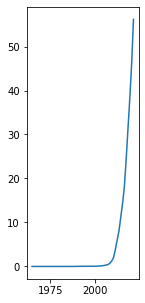

In [126]:
yearmean=df.groupby(["Year"]).mean() # this group s the data by year, and takes the mean, per year
global_solar_generation = yearmean['Solar Generation - TWh'] # this extracts the column related to Solar Energy

fig, ax = plt.subplots(figsize=(2,5))
ax.plot(global_solar_generation)
plt.show()

# Exercise 2: Explore the power of Python maps 

Let's now explore another dataset about global power plants. You can read more about it on the website: https://datasets.wri.org/dataset/globalpowerplantdatabase \
As before, dataset is already in our workspace, so you can load it into a 'dataframe' with the following command:

In [127]:
col_list = ['longitude', 'latitude', 'primary_fuel']
df = pandas.read_csv("global_power_plant_database.csv", usecols=col_list)
df

latitude  longitude primary_fuel
0       32.3220    65.1190        Hydro
1       31.6700    65.7950        Solar
2       31.6230    65.7920        Solar
3       34.5560    69.4787        Hydro
4       34.6410    69.7170        Hydro
...         ...        ...          ...
34931  -12.9667    28.6333          Oil
34932  -12.8167    28.2000          Oil
34933  -17.9167    25.8500        Hydro
34934  -18.3835    26.4700         Coal
34935  -16.5222    28.7619        Hydro

[34936 rows x 3 columns]

In [128]:
col_list = ['longitude', 'latitude', 'primary_fuel']
df = pandas.read_csv("global_power_plant_database.csv", usecols=col_list)
lon=df['longitude'][:]
lat=df['latitude'][:]

solar=df.groupby(["primary_fuel"]).get_group("Solar")
lon_solar=solar['longitude'][:]
lat_solar=solar['latitude'][:]

coal=df.groupby(["primary_fuel"]).get_group("Coal")
lon_coal=coal['longitude'][:]
lat_coal=coal['latitude'][:]

wind=df.groupby(["primary_fuel"]).get_group("Wind")
lon_wind=wind['longitude'][:]
lat_wind=wind['latitude'][:]

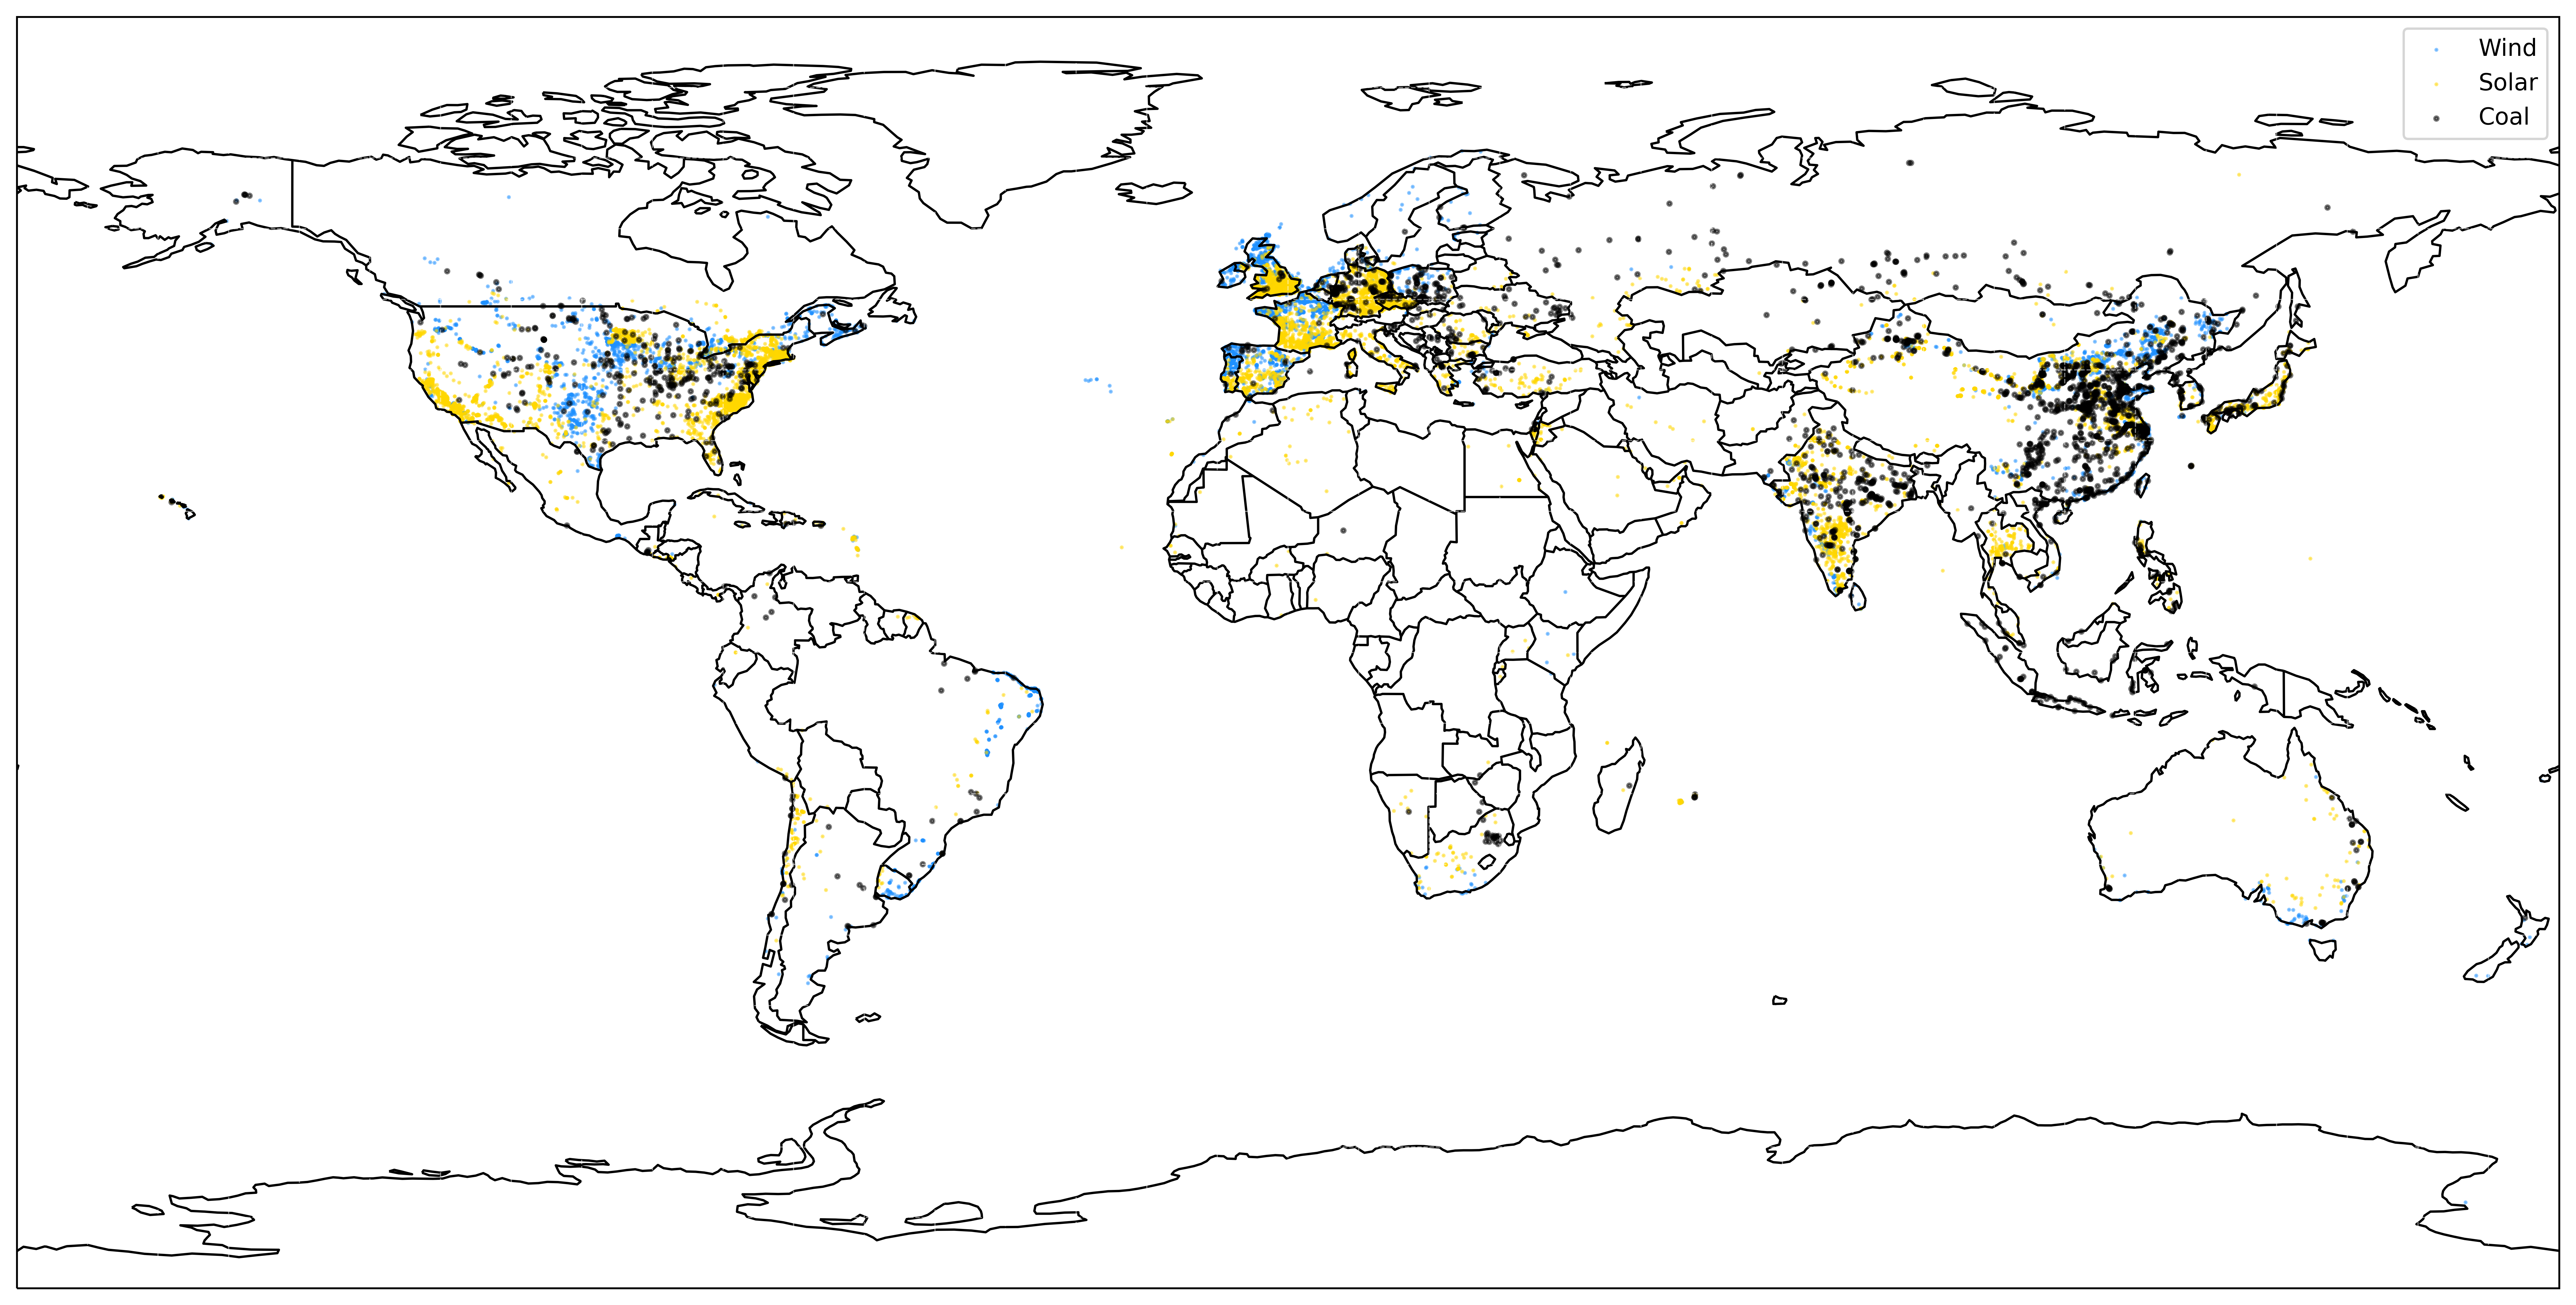

In [132]:
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.patches as mpatches 
from shapely.geometry.polygon import Polygon
import cartopy.feature as cfeature


%matplotlib inline

fig = plt.figure(figsize=(20,10), dpi=600)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
#ax.stock_img()
plt.scatter(x=lon_wind, y=lat_wind,
            color="dodgerblue",
            s=0.5,
            alpha=0.5,
            transform=ccrs.PlateCarree(),
            label='Wind')

plt.scatter(x=lon_solar, y=lat_solar,
            color="gold",
            s=0.5,
            alpha=0.5,
            transform=ccrs.PlateCarree(),
            label='Solar')

plt.scatter(x=lon_coal, y=lat_coal,
            color="black",
            s=3,
            alpha=0.5,
            transform=ccrs.PlateCarree(),
            label='Coal')

ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,linewidth=0.5, 
                  color='white', alpha=0.5, linestyle='--',
                  xlocs=np.arange(-180,180,10), ylocs=np.arange(-180,180,10))
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a1822b4d-c689-4a0a-9264-ddb09ede5724' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>